# Proyecto Salud Mental y Tasas de Suicidios

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
sns.set()

## Preparación de data

In [21]:
df = pd.read_csv("./world-suicide/master.csv")
data= df.drop(['country-year', 'HDI for year'], axis=1)
data.describe(include='all')

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [4]:
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [5]:
data.rename(columns={'gdp_per_capita ($)':'gdp_per_capita', ' gdp_for_year ($) ':'gdp_for_year'}, inplace=True)
data.gdp_for_year = data.gdp_for_year.apply(lambda x: float(''.join(x.split(','))))
data.age = data.age.apply(lambda x: x.replace("years", ""))
data.describe(include='all')

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,NaN,NaN,6
top,Mauritius,NaN,female,75+,NaN,NaN,NaN,NaN,NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,NaN,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000,NaN


In [22]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


## Análisis exploratorio

##### Porcentaje de suicidios en base a la población de cada país, dado que hay que evaluar en base al total de población por país.

In [6]:
data['suicides/pop'] = data['suicides_no']*100/data['population']
data_suicides_country = data.groupby('country', as_index=False)['suicides/pop'].mean().sort_values(by='suicides/pop', ascending=False)

data_suicides_country

,country,suicides/pop
52,Lithuania,0.040415
87,Sri Lanka,0.035295
75,Russian Federation,0.034892
40,Hungary,0.032762
11,Belarus,0.031076
...,...,...
65,Oman,0.000736
1,Antigua and Barbuda,0.000553
45,Jamaica,0.000522
76,Saint Kitts and Nevis,0.000000


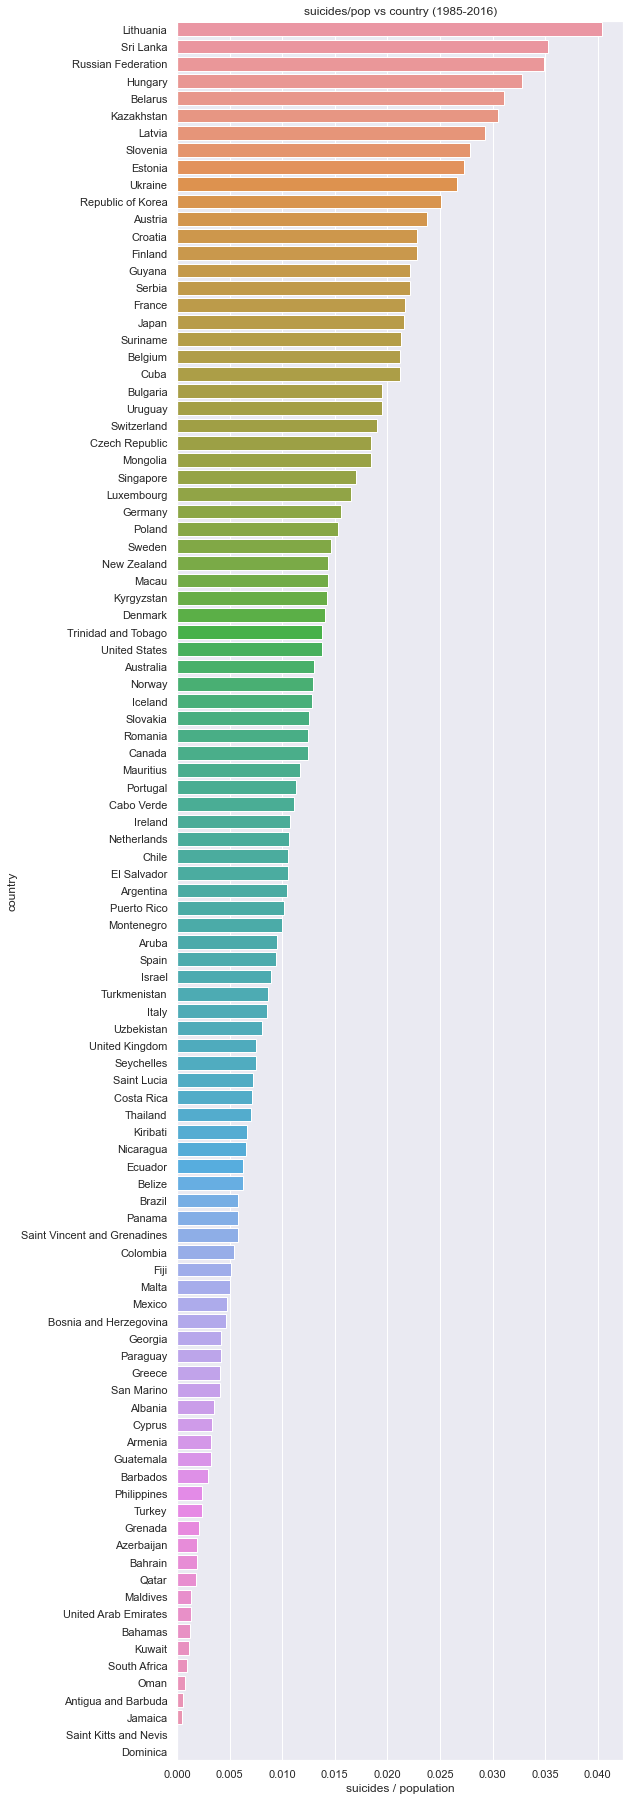

In [7]:
plt.figure(figsize=(8,32))
sns.barplot(y=data_suicides_country.country, x=data_suicides_country['suicides/pop'])
plt.xlabel("suicides / population")
plt.ylabel("country")
plt.title("suicides/pop vs country (1985-2016)")
plt.show()

#### Cantidad de suicidios hombres vs mujeres

c:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


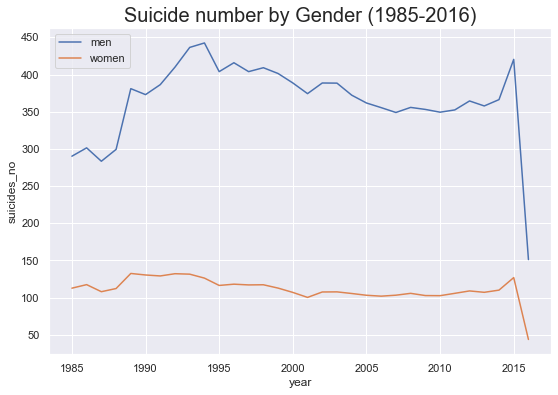

In [8]:
plt.figure(figsize=(9,6))
plt.title('Suicide number by Gender (1985-2016)', fontsize=20)
data_men = data[data['sex'] == 'male']
data_women = data[data['sex'] == 'female']
sns.lineplot(data_men.year, data_men.suicides_no, ci = None)
sns.lineplot(data_women.year, data_women.suicides_no, ci = None)
plt.legend(['men','women'])
plt.show()

#### Suicidios por rango de edad

c:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
c:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


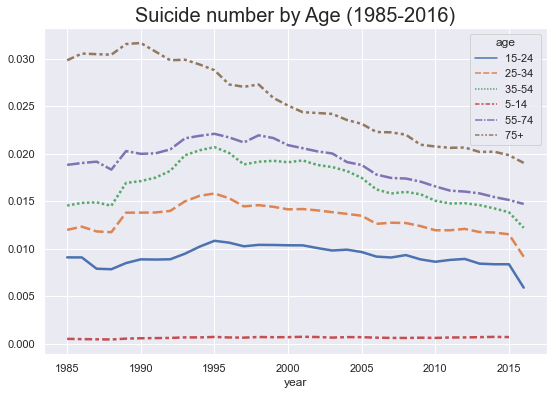

In [11]:
data_age = data.groupby(['year', 'age'])['suicides_no', 'population'].sum()
data_reset = data_age.copy().reset_index()
plt.figure(figsize=(9,6))
plt.title('Suicide number by Age (1985-2016)', fontsize=20)
sns.lineplot('year', data_reset.suicides_no*100/data_reset['population'], hue='age',
            data=data_reset, linewidth=2.5, style='age')
plt.show()

### Suicidios por generación

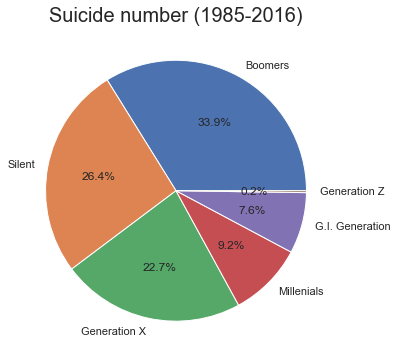

In [13]:
data_generation =  data.groupby('generation', as_index=False)['suicides_no'].sum().sort_values(by='suicides_no', ascending=False)
plt.figure(figsize=(6,6))
plt.title('Suicide number (1985-2016)', fontsize=20)
plt.pie(data_generation.suicides_no, labels=data_generation.generation, autopct='%1.1f%%')
plt.show()

### Tasa de suicidios en mapa mundial

In [40]:
count = [ dict(
        type = 'choropleth',
        locations = data_suicides_country['country'],
        locationmode='country names',
        z = data_suicides_country['suicides/pop'],
        text = data_suicides_country['country'],
        colorscale = 'Viridis',
        autocolorscale = False,
        reversescale = True,
        # set the plotly gragh color
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        # add a color bar 
        colorbar = dict(
            autotick =False,
            title = 'Happiness Score Country-based'),
      ) ]
# create layout for gragh
layout = dict(
    title = 'Happiness Score a nivel Global',
    # 
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)
# prepare the fig parameter
fig = dict( data=count, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )